In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max
from PIL import Image

from skimage.morphology import skeletonize, thin
from skimage.util import invert
from skimage import measure
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import black_tophat, skeletonize, convex_hull_image
from skimage.morphology import disk
from skimage import feature
from skimage.filters import roberts, sobel, scharr, prewitt
import seaborn as sns
sns.reset_orig()

from skimage import restoration

from skimage import exposure
from skimage.filters import gaussian

from scipy import ndimage

from time import time

from skimage.color import rgb2gray
from scipy import ndimage as ndi

from skimage.filters.rank import entropy
import scipy


import networkx as nx
from scipy import interpolate

from skimage.segmentation import random_walker
from skimage.data import binary_blobs
from skimage.exposure import rescale_intensity
import glob

from skimage.morphology import disk
from skimage import io


from skimage.external import tifffile

import pandas as pd

from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering


/Users/spencerlab/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/spencerlab/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [2]:
csv = pd.read_csv('GREEN.csv')
data = np.asarray(csv.values)
data2 = data[:,1:4]

In [3]:
data2

array([[   2, 1420, 1837],
       [   2, 1468, 1181],
       [   2, 2095, 1022],
       ...,
       [ 274, 2113,   28],
       [ 274, 2130,   42],
       [ 274, 2130,   31]])

In [4]:
def calc_distance(arr, kms):
    distances = arr.copy()
    
    
    for i in range(len(kms.cluster_centers_) ):
    
        wh = np.where(kms.labels_==i)[0]
        distances[wh] = arr[wh] - kms.cluster_centers_[i]
    
    
    distances2 = np.square(distances)
    distance = np.sqrt( distances2[:, 0] + distances2[:, 1] +distances2[:, 2] )
    
    return distance

In [5]:
def max_dist(dist, kms):
    
    md = kms.cluster_centers_[:,0]
    
    for i in range( len(kms.cluster_centers_) ):
        wh = np.where(kms.labels_==i)[0]
        md[i] = max(dist[wh])
        
    return md

In [6]:
def avg_dist(dist, kms):
    
    md = kms.cluster_centers_[:,0]
    
    for i in range( len(kms.cluster_centers_) ):
        wh = np.where(kms.labels_==i)[0]
        
        dtt = dist[wh]
        md[i] = sum(dtt)/len(dtt)
        
    return md

In [7]:
kmeans = KMeans(n_clusters=20, random_state=0).fit(data2)

In [8]:
def kcentrs(k_centers):
    
    cluster_distances = np.zeros(shape = (len(k_centers) ,len(k_centers)) )
    cluster_distances_2 = np.zeros(shape = (len(k_centers) ) )
    
    for i in range(len(k_centers)):
    
        diffpts = k_centers - k_centers[i] 
        tot  = np.sqrt(np.square(diffpts[:,0]) + np.square(diffpts[:,1]) + np.square(diffpts[:,2]))
        cluster_distances[:,i] = tot
        
        
        if i==0:
            minimum = tot[1]
        else: 
            minimum = tot[0]
            
            
        
        for x in range(len(tot)):
            if x != i and tot[x]<minimum:
                minimum = tot[x]
            
            
        cluster_distances_2[i] = minimum
        
        
    return cluster_distances_2

In [9]:
kmeans_X = []


kmeans_Y_avg_radius = []
kmeans_Y_max_radius = []
kmeans_Y_clstr_dists = []

for i in range(2, len(data2)-1):
    
    kmeans = KMeans(n_clusters=i, random_state=0).fit(data2)
    dst = avg_distance(data2, kmeans)
    
    
    
    
    
    mdst = max_dist(dst, kmeans)
    adst = avg_dist(dst, kmeans)
    
    clstr_dists = kcentrs(kmeans.cluster_centers_)
    
    
    print(i)
    
    kmeans_X.append([i])
    
    kmeans_Y_avg_radius.append(sum(adst)/len(adst))
    
    kmeans_Y_max_radius.append(sum(mdst)/len(mdst) )
    
    kmeans_Y_clstr_dists.append( sum(clstr_dists)/len(clstr_dists) )

NameError: name 'avg_distance' is not defined

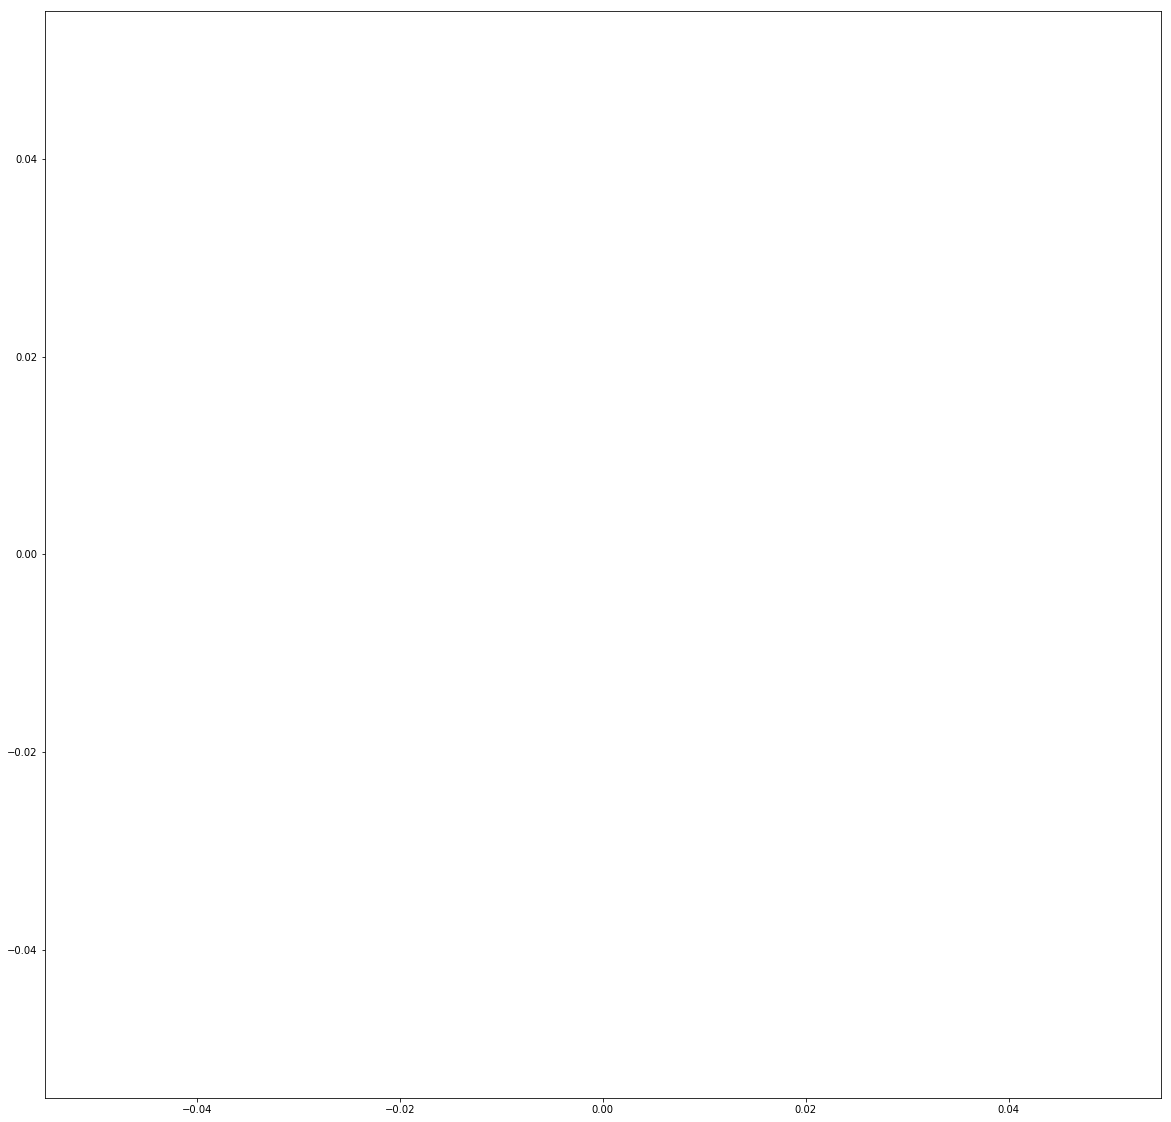

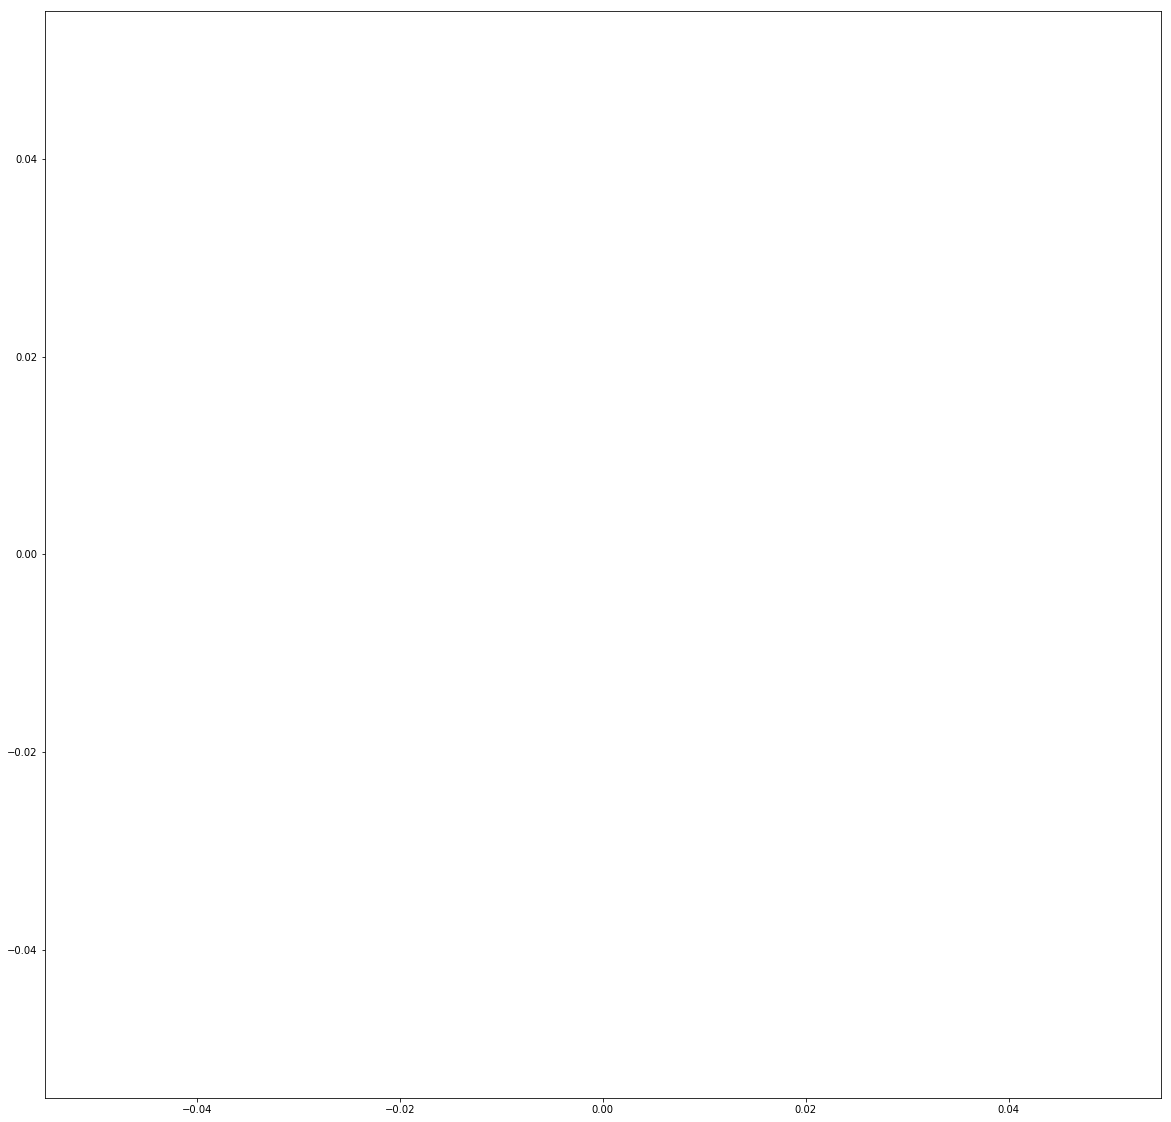

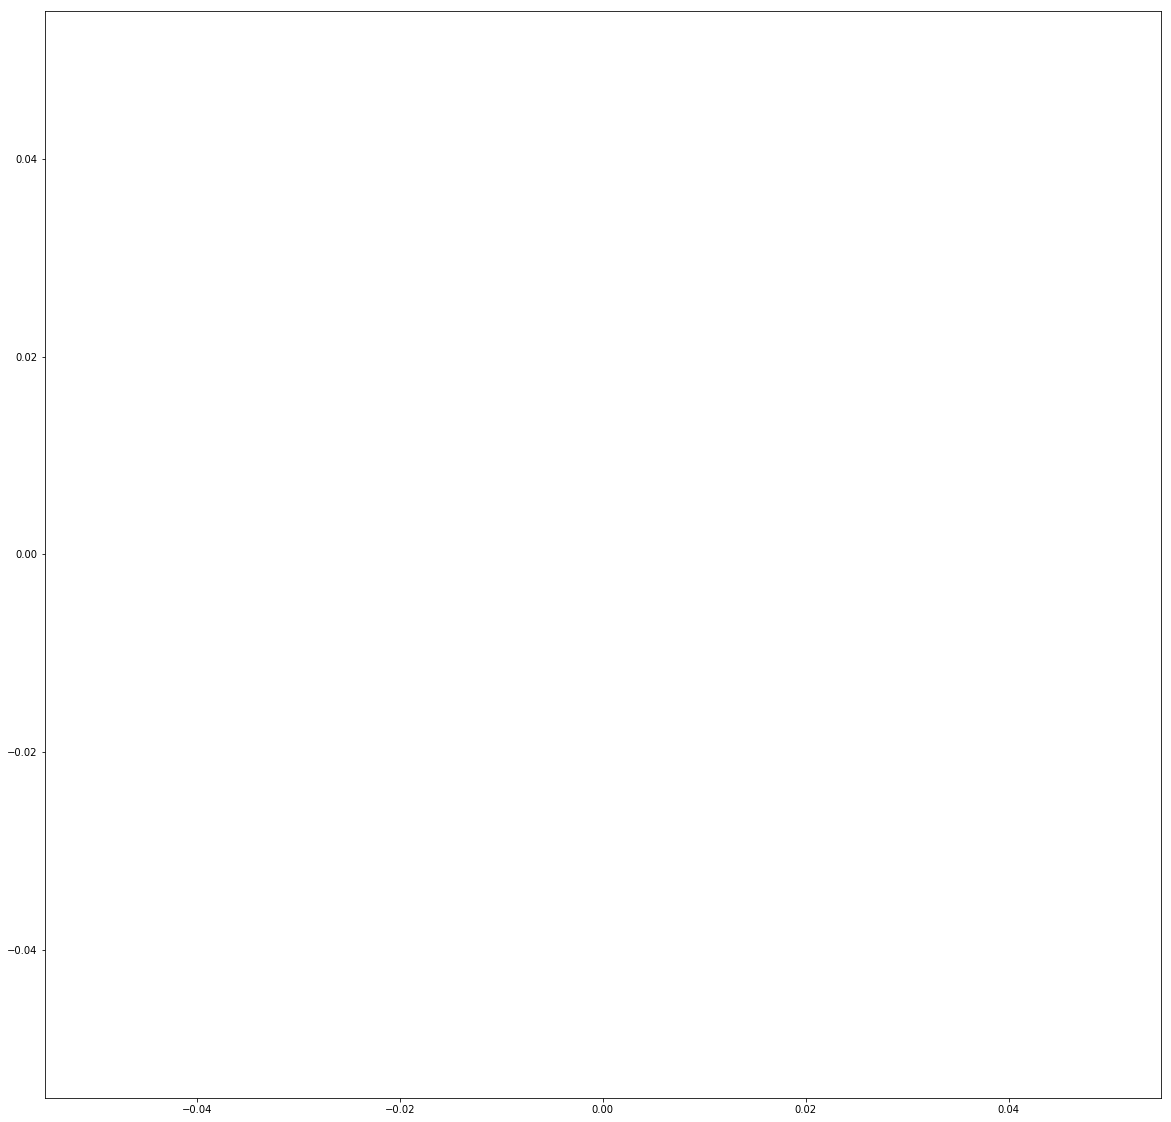

In [10]:
plt.figure(figsize=(20,20))
plt.scatter(kmeans_X, kmeans_Y_avg_radius)

plt.figure(figsize=(20,20))
plt.scatter(kmeans_X, kmeans_Y_max_radius)

plt.figure(figsize=(20,20))
plt.scatter(kmeans_X, kmeans_Y_clstr_dists)

In [15]:
A=[[[0, 0, 0], [0, 0, 0], [0, 0, 0]],
 [[0, 0, 0], [0, 0, 0], [0, 0, 0]],
 [[0, 0, 0], [0, 0, 0], [0, 0, 0]]]

In [20]:
np.sum([A,A],axis=2)


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]])